In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('GT1_FINAL.csv')

In [4]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,apex,fqdns,firstseen-pdns,lastseen-pdns,days count-pdns,query count,name servers,ns domain,...,sibling_domain_marked_malicious,Number_of_query_parameters,Positive_count,Response_code,URL_after_redirects,resolution,rlength,url_length,number of days between firstseen and lastseen,Alexa rank (avg)
0,0,0,xorax.info,xorax.info,2013-10-02,2020-01-04,13856,1,1,True,...,0.0,0,5,403,False,37.59.35.161,234,50,1097,728788.00
1,1,1,in.net,l00adbum.h7b4.in.net,2019-08-13,2019-08-13,32,1,2,True,...,2357.0,0,5,200,False,91.202.63.42,20121,28,3,743018.75
2,2,2,gemtown88.com,securelogin.poste.it.gemtown88.com,2019-08-07,2019-08-08,5,1,3,True,...,0.0,0,8,403,False,113.11.250.72,122,74,2,788010.00
3,3,3,beageagae.com,www.payment-confirmation-account.beageagae.com,2019-07-17,2019-07-19,23,1,1,True,...,1.0,0,5,None,False,on,None,62,0,420622.00
4,4,4,acteltechnologies.com,us-en.face-book-com-2979643306.acteltechnologi...,2019-08-15,2019-08-16,14,1,4,True,...,141.0,0,6,200,False,199.188.204.102,818,60,0,883527.50


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'apex', 'fqdns', 'firstseen-pdns',
       'lastseen-pdns', 'days count-pdns', 'query count', 'name servers',
       'ns domain', 'soa_domains_nos', 'soa_domain', 'suspicious_tld',
       'length', 'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar',
       'is_idn', 'minus', 'num_subdomains', 'Label', 'Number_of_total_Scans',
       'Number_of_Benign_Scans', 'apex_marked_malicious',
       'domain_marked_malicious', 'sibling_domain_marked_malicious',
       'Number_of_query_parameters', 'Positive_count', 'Response_code',
       'URL_after_redirects', 'resolution', 'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Alexa rank (avg)'],
      dtype='object')

In [6]:
print('Attacker-Created Compromised Data set 1')
print('Size of the data set {}'.format(df.shape[0]))
print('Size of the Attacker-Created set {}'.format(df.loc[df.Label=='Attacker-Created'].shape[0]))
print('Size of the Compromised set {}'.format(df.loc[df.Label=='Compromised'].shape[0]))

Attacker-Created Compromised Data set 1
Size of the data set 1435
Size of the Attacker-Created set 731
Size of the Compromised set 704


In [7]:
df = df[[ 'apex', 'fqdns', 'firstseen-pdns', 'lastseen-pdns',
       'days count-pdns', 'query count', 'name servers', 'ns domain',
       'soa_domains_nos', 'soa_domain', 'suspicious_tld', 'length', 'entropy',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'minus',
       'num_subdomains', 'Label', 'Number_of_total_Scans',
       'Number_of_Benign_Scans', 'apex_marked_malicious',
       'domain_marked_malicious', 'sibling_domain_marked_malicious',
       'Number_of_query_parameters', 'Positive_count', 'Response_code',
       'URL_after_redirects', 'resolution', 'rlength', 'url_length',
       'number of days between firstseen and lastseen','Alexa rank (avg)']]

In [8]:
data = []
for index, row in df.iterrows():
    try:
        row.rlength = float(row.rlength)
        data.append(row)
    except:
        row.rlength = -1
        data.append(row)
    try:
        row.url_length  = float(row.url_length)
    except:
        row.url_length  = float(len(row.fqdns))
data = pd.DataFrame(data)        

In [9]:
data.dtypes

apex                                              object
fqdns                                             object
firstseen-pdns                                    object
lastseen-pdns                                     object
days count-pdns                                    int64
query count                                        int64
name servers                                       int64
ns domain                                         object
soa_domains_nos                                    int64
soa_domain                                        object
suspicious_tld                                    object
length                                             int64
entropy                                          float64
fake_tld                                           int64
brand                                              int64
pop_keywords                                       int64
similar                                            int64
minus                          

In [10]:
data.head(1).Label

0    Compromised
Name: Label, dtype: object

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['suspicious_tld'] = label_encoder.fit_transform(data['suspicious_tld'])
data['Label'] = label_encoder.fit_transform(data['Label'])
data['ns domain'] = label_encoder.fit_transform(data['ns domain'])
data['soa_domain'] = label_encoder.fit_transform(data['soa_domain'])


data['Response_code'] = label_encoder.fit_transform(data['Response_code'])
data['URL_after_redirects'] = label_encoder.fit_transform(data['URL_after_redirects'])

In [12]:
data['days count-pdns'] = data['days count-pdns']/( data['days count-pdns'].max()-data['days count-pdns'].min())
data['number of days between firstseen and lastseen'] = data['number of days between firstseen and lastseen']/(data['number of days between firstseen and lastseen'].max()-data['number of days between firstseen and lastseen'].min())

In [13]:
data.head(5)

,apex,fqdns,firstseen-pdns,lastseen-pdns,days count-pdns,query count,name servers,ns domain,soa_domains_nos,soa_domain,...,sibling_domain_marked_malicious,Number_of_query_parameters,Positive_count,Response_code,URL_after_redirects,resolution,rlength,url_length,number of days between firstseen and lastseen,Alexa rank (avg)
0,xorax.info,xorax.info,2013-10-02,2020-01-04,1.271171e-04,1,1,1,1,1,...,0.0,0,5,6,0,37.59.35.161,234.0,50.0,0.361927,728788.00
1,in.net,l00adbum.h7b4.in.net,2019-08-13,2019-08-13,2.935731e-07,1,2,1,2,0,...,2357.0,0,5,0,0,91.202.63.42,20121.0,28.0,0.000990,743018.75
2,gemtown88.com,securelogin.poste.it.gemtown88.com,2019-08-07,2019-08-08,4.587080e-08,1,3,1,1,0,...,0.0,0,8,6,0,113.11.250.72,122.0,74.0,0.000660,788010.00
3,beageagae.com,www.payment-confirmation-account.beageagae.com,2019-07-17,2019-07-19,2.110057e-07,1,1,1,1,0,...,1.0,0,5,15,0,on,-1.0,62.0,0.000000,420622.00
4,acteltechnologies.com,us-en.face-book-com-2979643306.acteltechnologi...,2019-08-15,2019-08-16,1.284382e-07,1,4,1,5,0,...,141.0,0,6,0,0,199.188.204.102,818.0,60.0,0.000000,883527.50


In [14]:
data.head(1).Label

0    1
Name: Label, dtype: int64

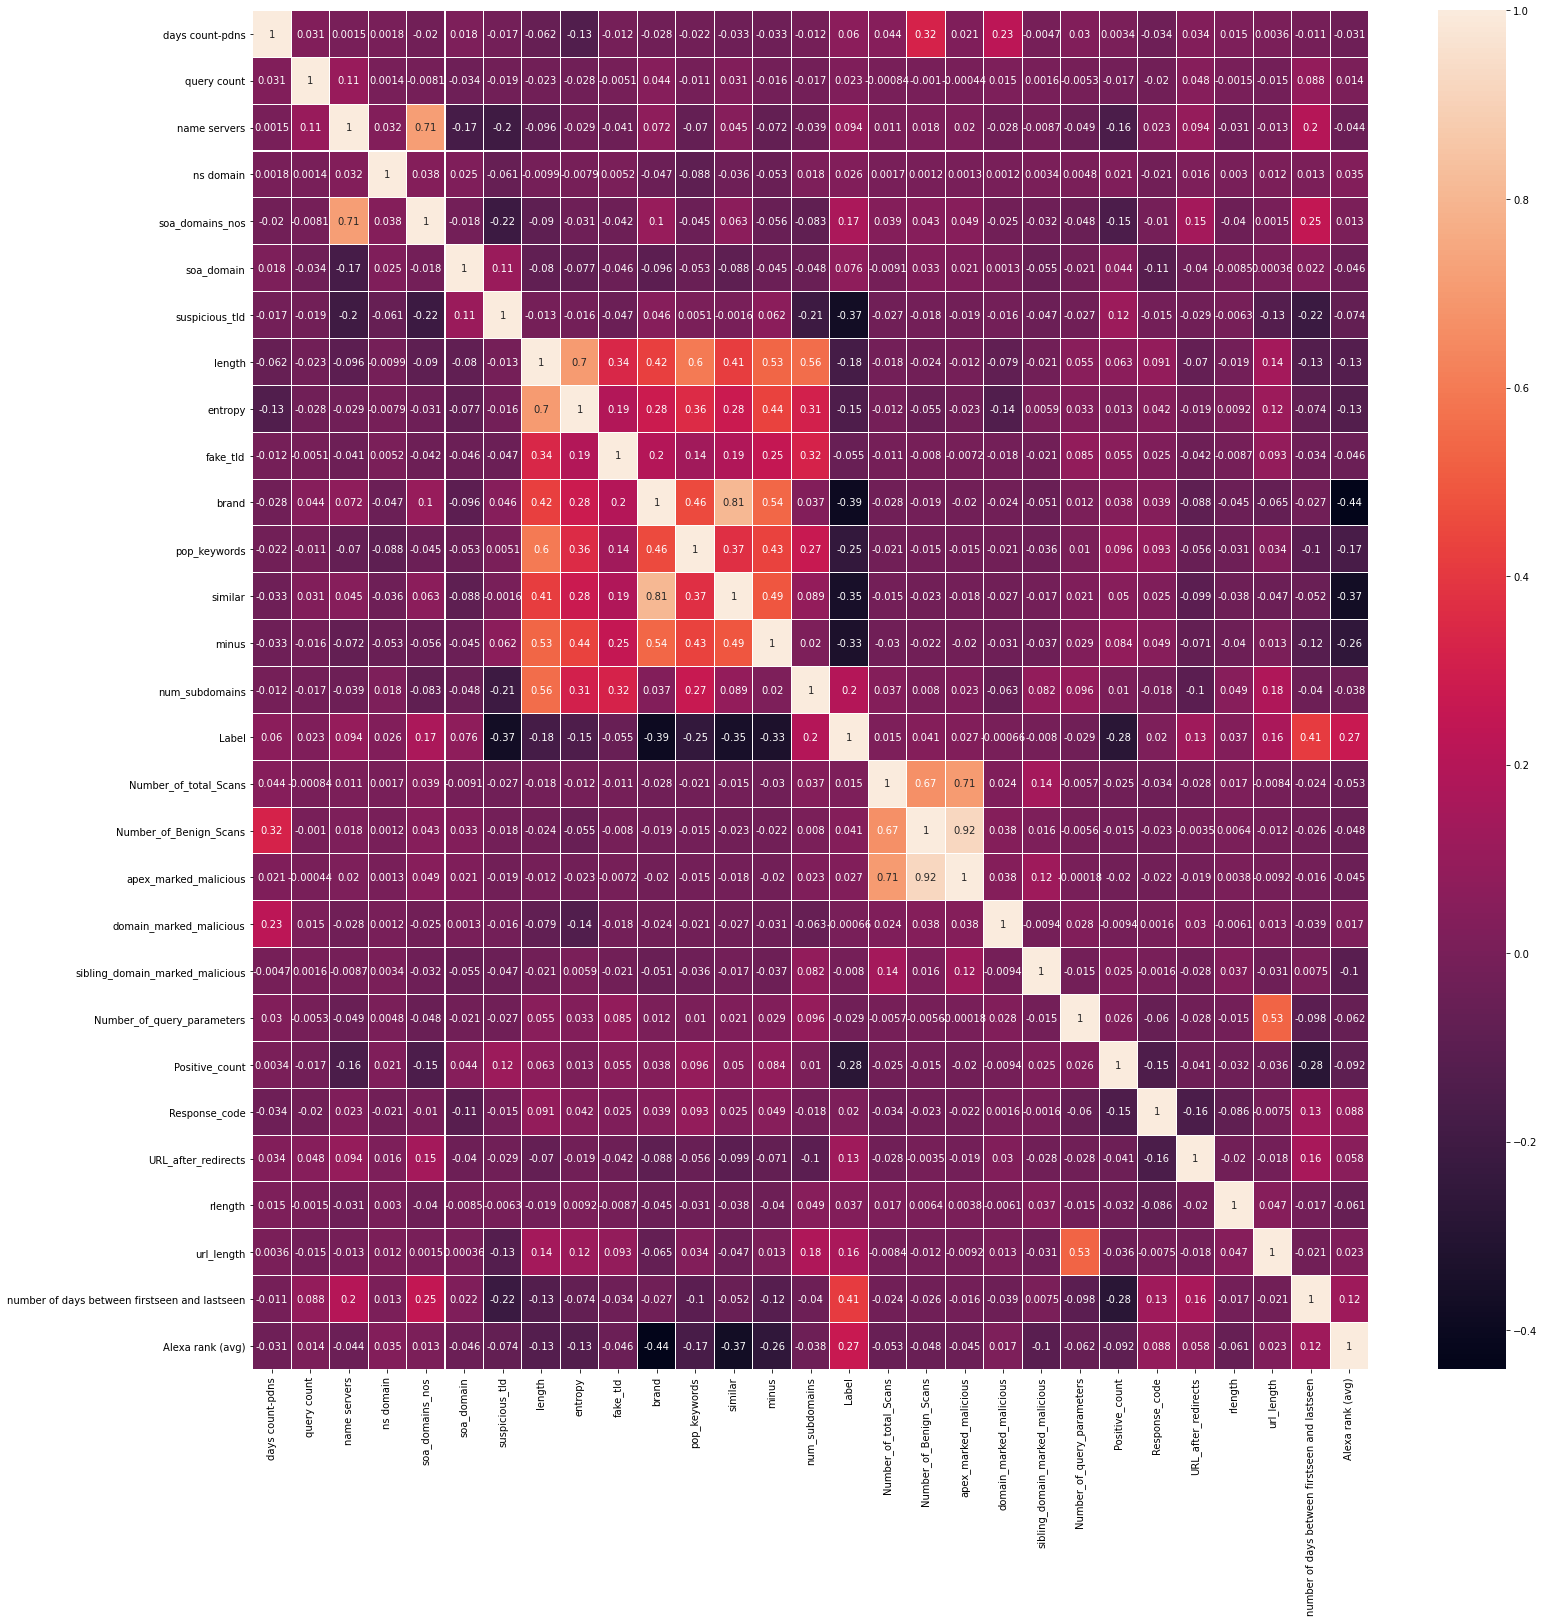

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot = True ,linewidths=.05)
plt.savefig('attacker_created_compromised_corr_gt1.png')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data[[
       'days count-pdns', 'query count', 'name servers', 'ns domain',
       'soa_domains_nos', 'soa_domain', 'suspicious_tld', 'length', 'entropy',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'minus',
       'num_subdomains', 'Number_of_total_Scans',
       'Number_of_Benign_Scans', 'apex_marked_malicious',
       'domain_marked_malicious', 'sibling_domain_marked_malicious',
       'Number_of_query_parameters', 'Positive_count', 'Response_code',
       'URL_after_redirects', 'rlength', 'url_length',
       'number of days between firstseen and lastseen','Alexa rank (avg)']
], data.Label, test_size = 0.20, random_state = 0)

In [17]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['RandomForestClassifier : ',RandomForestClassifier()],      
      ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(Y_test,predictions))
    print(name,accuracy_score(Y_test,predictions),' precision : ',precision_score(Y_test,predictions),' recall : ',recall_score(Y_test,predictions))

Logistic Regression : 0.6480836236933798  precision :  0.5990783410138248  recall :  0.9027777777777778
Decision Tree Classification : 0.89198606271777  precision :  0.9124087591240876  recall :  0.8680555555555556
Gradient Boosting Classification : 0.8954703832752613  precision :  0.8851351351351351  recall :  0.9097222222222222
Ada Boosting Classification : 0.8815331010452961  precision :  0.8928571428571429  recall :  0.8680555555555556
Extra Tree Classification : 0.926829268292683  precision :  0.9241379310344827  recall :  0.9305555555555556
K-Neighbors Classification : 0.6829268292682927  precision :  0.6934306569343066  recall :  0.6597222222222222
Support Vector Classification : 0.6411149825783972  precision :  0.6132596685082873  recall :  0.7708333333333334
RandomForestClassifier :  0.9198606271777003  precision :  0.9115646258503401  recall :  0.9305555555555556


In [18]:
X_trainLR1, X_testLR1, Y_trainLR1, Y_testLR1 = train_test_split(data[['Alexa rank (avg)']
], data.Label, test_size = 0.20, random_state = 0)

from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_trainLR1,Y_trainLR1)
predictionsLR1 = model1.predict(X_testLR1)
print('GT 1 LogisticRegression - Only Alexa',accuracy_score(Y_testLR1,predictionsLR1),' precision : ',precision_score(Y_testLR1,predictionsLR1),' recall : ',recall_score(Y_testLR1,predictionsLR1))


X_trainLR2, X_testLR2, Y_trainLR2, Y_testLR2 = train_test_split(data[['days count-pdns']
], data.Label, test_size = 0.20, random_state = 0)


model2=LogisticRegression()
model2.fit(X_trainLR2,Y_trainLR2)
predictionsLR2 = model2.predict(X_testLR2)
print('GT 1 LogisticRegression - Only PDNS',accuracy_score(Y_testLR2,predictionsLR2),' precision : ',precision_score(Y_testLR2,predictionsLR2),' recall : ',recall_score(Y_testLR2,predictionsLR2))

X_trainLR3, X_testLR3, Y_trainLR3, Y_testLR3 = train_test_split(data[['Alexa rank (avg)', 'days count-pdns']
], data.Label, test_size = 0.20, random_state = 0)


model3=LogisticRegression()
model3.fit(X_trainLR3,Y_trainLR3)
predictionsLR3 = model3.predict(X_testLR3)
print('GT 1 LogisticRegression - Both PDNS & Alexa',accuracy_score(Y_testLR3,predictionsLR3),' precision : ',precision_score(Y_testLR3,predictionsLR3),' recall : ',recall_score(Y_testLR3,predictionsLR3))

GT 1 LogisticRegression - Only Alexa 0.6655052264808362  precision :  0.6  recall :  1.0
GT 1 LogisticRegression - Only PDNS 0.49825783972125437  precision :  0.0  recall :  0.0
GT 1 LogisticRegression - Both PDNS & Alexa 0.6655052264808362  precision :  0.6  recall :  1.0


In [19]:
RFC = RandomForestClassifier()

In [20]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,1001,100))
max_depth = list(range(1,1001,100))

hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(RFC, hyperparameters, cv=5,n_jobs=100, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

print('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 500 out of 500 | elapsed:  1.9min finished


Best Estimators: 701
Best Max Depth: 701


In [21]:
RFC = RandomForestClassifier(max_depth=601, n_estimators=401)
RFC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [22]:
print('Random Forest',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Random Forest 0.9198606271777003  precision :  0.9230769230769231  recall :  0.9166666666666666 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       143
           1       0.92      0.92      0.92       144

    accuracy                           0.92       287
   macro avg       0.92      0.92      0.92       287
weighted avg       0.92      0.92      0.92       287



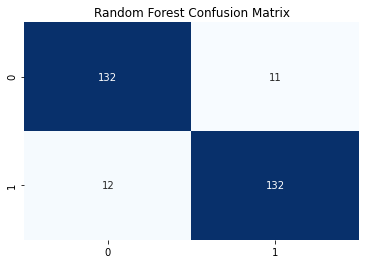

In [23]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, predictions_RFC),annot=True,cmap="Blues",fmt="g",cbar=False)
plt.savefig('attacker_created_compromised_classifier_confusion_matrix_gt1.png')
plt.show()

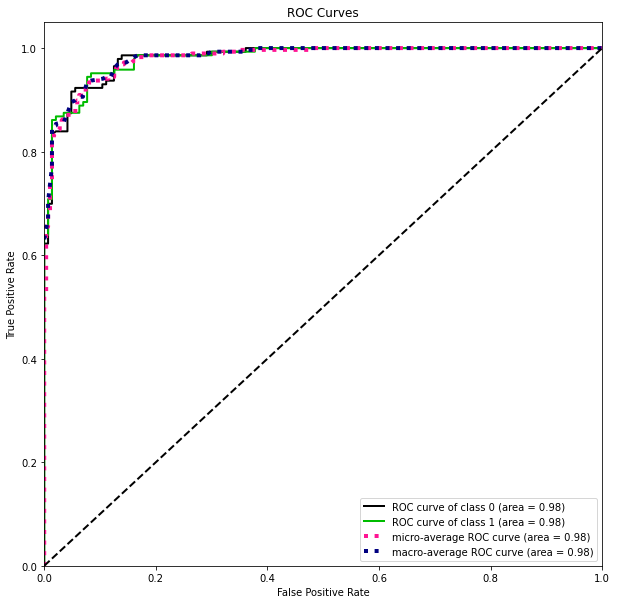

In [24]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (10,10))
plt.savefig('attacker_created_compromised_classifier_roc_gt1.png')
plt.show()

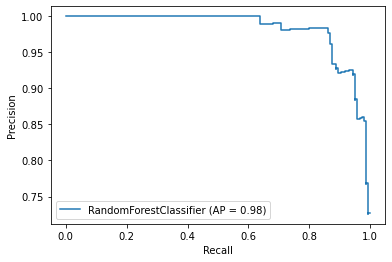

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(RFC, X_test, Y_test)
plt.savefig('attacker_created_compromised_classifier_precision_recall_curve_gt1.png')

Feature ranking:
1. feature 0 - days count-pdns (0.22114550846604503)
2. feature 26 - number of days between firstseen and lastseen (0.13712516240495995)
3. feature 27 - Alexa rank (avg) (0.07633459061224332)
4. feature 25 - url_length (0.06276103047068333)
5. feature 10 - brand (0.04325243394426563)
6. feature 1 - query count (0.03600490026140307)
7. feature 18 - domain_marked_malicious (0.03571635744711479)
8. feature 14 - num_subdomains (0.03570866926001121)
9. feature 12 - similar (0.032678049950139634)
10. feature 24 - rlength (0.03240194410602238)
11. feature 15 - Number_of_total_Scans (0.030731112431594744)
12. feature 7 - length (0.027797480986944338)
13. feature 17 - apex_marked_malicious (0.02708957689747221)
14. feature 8 - entropy (0.026740668624986544)
15. feature 6 - suspicious_tld (0.02576954881442323)
16. feature 19 - sibling_domain_marked_malicious (0.022681987561306554)
17. feature 13 - minus (0.021270133913132067)
18. feature 21 - Positive_count (0.02071632140437552)

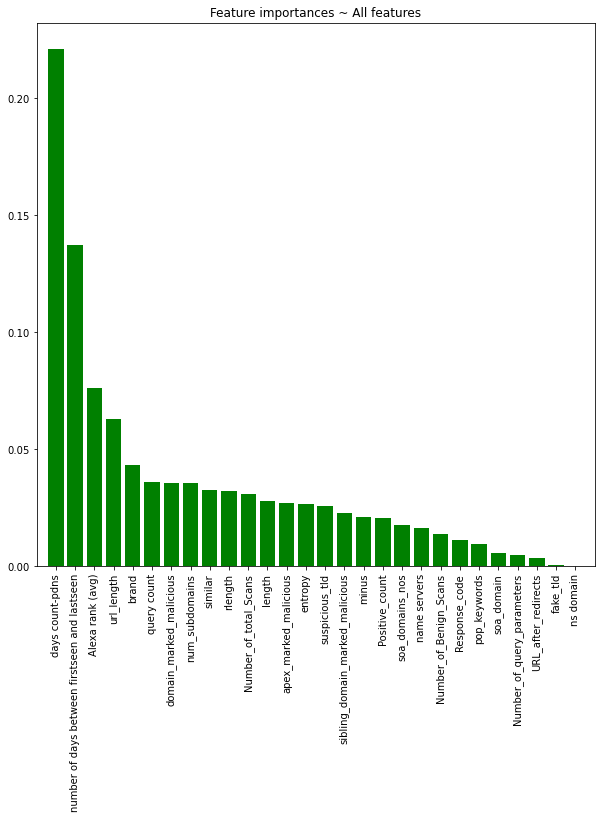

In [26]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = ['days count-pdns', 'query count', 'name servers', 'ns domain',
       'soa_domains_nos', 'soa_domain', 'suspicious_tld', 'length', 'entropy',
       'fake_tld', 'brand', 'pop_keywords', 'similar', 'minus',
       'num_subdomains', 'Number_of_total_Scans',
       'Number_of_Benign_Scans', 'apex_marked_malicious',
       'domain_marked_malicious', 'sibling_domain_marked_malicious',
       'Number_of_query_parameters', 'Positive_count', 'Response_code',
       'URL_after_redirects', 'rlength', 'url_length',
       'number of days between firstseen and lastseen','Alexa rank (avg)']
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure(figsize=(10,10))
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('attacker_created_compromised_classifier_feature_importances_gt1.png')
plt.show()

In [27]:
import pickle
pickle.dump(RFC,open('attacker_created_compromised_classifier_rf_gt_1.pickle','wb'))